In [51]:
import tensorflow as tf
from matplotlib import pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [52]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/normal-vs-military-vehicles/dataset/train')
data_val = tf.keras.utils.image_dataset_from_directory('/kaggle/input/normal-vs-military-vehicles/dataset/validation')
data_test = tf.keras.utils.image_dataset_from_directory('/kaggle/input/normal-vs-military-vehicles/dataset/test')

Found 11170 files belonging to 2 classes.
Found 3491 files belonging to 2 classes.
Found 2792 files belonging to 2 classes.


In [53]:
'''
[
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [256,256,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.Flatten(),


keras.layers.Dense(256, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.2),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.2),

keras.layers.Dense(1, activation ='sigmoid')]
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),
    
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

'''

"\n[\nkeras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [256,256,3]),\nkeras.layers.MaxPooling2D(),\nkeras.layers.Conv2D(32, (2, 2), activation='relu'),\nkeras.layers.MaxPooling2D(),\n\nkeras.layers.Flatten(),\n\n\nkeras.layers.Dense(256, activation='relu'),\nkeras.layers.BatchNormalization(),\nkeras.layers.Dropout(0.2),\n\nkeras.layers.Dense(64, activation='relu'),\nkeras.layers.BatchNormalization(),\nkeras.layers.Dropout(0.2),\n\nkeras.layers.Dense(1, activation ='sigmoid')]\nkeras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),\nkeras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),\nkeras.layers.BatchNormalization(),\nkeras.layers.MaxPool2D(),\nkeras.layers.Dropout(0.2),\n    \nkeras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),\nkeras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),\nkeras.layers.BatchNormalization(),\nkeras.layers.MaxPool2D(),\nkeras.layers.Dropout(0.2),\n\n"

In [54]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers,models
model = Sequential()

In [55]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
'''
data = data.map(lambda x,y:(x/255,y))
data_val = data_val.map(lambda x,y:(x,y))
data_test = data_test.map(lambda x,y:(x,y))

'''
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = data.map(lambda x, y: (normalization_layer(x), y))
normalized_val_set = data_val.map(lambda x, y: (normalization_layer(x), y))

In [57]:
 callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [58]:
opt=keras.optimizers.Adam(learning_rate=0.00001)
model.compile(opt, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 32)      

In [60]:
hist = model.fit(normalized_training_set, epochs=15, validation_data=normalized_val_set,batch_size=16, callbacks=[callback])

Epoch 1/15
350/350 [==============================] - 24s 65ms/step - loss: 0.6714 - accuracy: 0.5756 - val_loss: 0.6134 - val_accuracy: 0.6737
Epoch 2/15
350/350 [==============================] - 23s 64ms/step - loss: 0.5857 - accuracy: 0.6991 - val_loss: 0.4971 - val_accuracy: 0.7803
Epoch 3/15
350/350 [==============================] - 22s 63ms/step - loss: 0.5117 - accuracy: 0.7567 - val_loss: 0.4398 - val_accuracy: 0.8069
Epoch 4/15
350/350 [==============================] - 23s 65ms/step - loss: 0.4649 - accuracy: 0.7911 - val_loss: 0.4134 - val_accuracy: 0.8293
Epoch 5/15
350/350 [==============================] - 24s 66ms/step - loss: 0.4380 - accuracy: 0.8085 - val_loss: 0.4009 - val_accuracy: 0.8321
Epoch 6/15
350/350 [==============================] - 23s 65ms/step - loss: 0.4241 - accuracy: 0.8145 - val_loss: 0.3929 - val_accuracy: 0.8367
Epoch 7/15
350/350 [==============================] - 24s 67ms/step - loss: 0.4127 - accuracy: 0.8245 - val_loss: 0.3863 - val_accuracy:

# Plot Performance

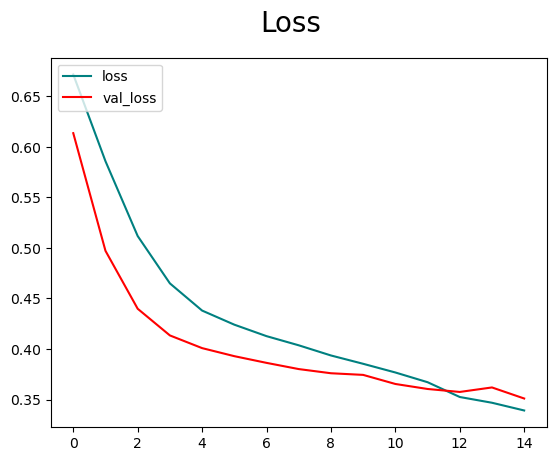

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

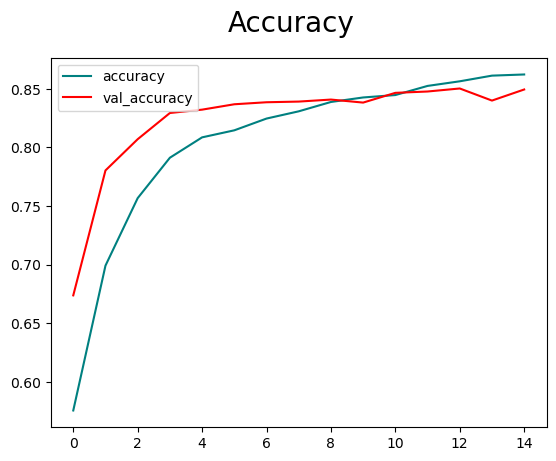

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [68]:
save_path = "/kaggle/working/"
from tensorflow.keras.models import load_model
model.save(os.path.join('son_model.h5'))